# Unsupervised Learning: Clustering Lab





In [2]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
import numpy as np
from numpy import ndarray
import pandas as pd
from scipy.io import arff
from yellowbrick.cluster import SilhouetteVisualizer
from tabulate import tabulate
import csv
from typing import List, Tuple
import random

In [35]:
def load_iris() -> ndarray:
  return _load_arff_to_np("iris.arff")[:, :-1]

def load_abalone() -> ndarray:
  return _load_arff_to_np("abalone.arff")

def load_credit_card_default(n_samples=1000) -> ndarray:
  # https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
  X = np.loadtxt('credit_card_default.csv', delimiter=',', dtype=str)
  X = X[2:n_samples, 1:-1]
  X = X.astype(float)
  X = preprocessing.MinMaxScaler().fit_transform(X)

  return X

def _load_arff_to_np(filename: str) -> ndarray:
  data_arff = arff.loadarff(filename)
  data_df = pd.DataFrame(data_arff[0])

  return data_df.to_numpy()

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1)

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [ ]:
# K-means with Abalone
X = load_abalone()
kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=0).fit(X)

print("Labels:")
print(kmeans.labels_)
print("k=3 cluster centers:")
print(kmeans.cluster_centers_)
print("Number of iterations to converge:")
print(kmeans.n_iter_)
print("Total sum squared error of each point from its cluster center:")
print(kmeans.inertia_)
print("Total average silhouette score:")
print(silhouette_score(X, kmeans.predict(X)))

Labels:
[1 0 2 2 0 0 1 1 2 1 1 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 0 1
 0 2 2 2 1 0 0 0 0 2 0 0 2 0 0 2 2 0 0 0 0 0 0 0 2 2 0 0 0 2 1 2 0 1 0 1 2
 1 1 2 2 2 1 2 2 1 1 1 2 1 2 2 2 1 2 1 2 1 1 2 0 0 2 0 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 0 1 0 0 0 0 0 1 1 1 2 0 0 0 0 0 2 2 2 2 2 1 2 2 2 2 2
 0 0 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 0 0 0 0 0 0 0 0 2 1 1 2 2 2
 1 2 2 2 2 1 2 1 0 2 2 2 1 1 2]
k=3 cluster centers:
[[ 0.37518868  0.28754717  0.09283019  0.31228302  0.13264151  0.07159434
   0.09832075  6.79245283]
 [ 0.61092593  0.4837963   0.16916667  1.2580463   0.48016667  0.25992593
   0.42623148 15.46296296]
 [ 0.52295699  0.41080645  0.1388172   0.76        0.30589247  0.17220968
   0.24027419 10.23655914]]
Number of iterations to converge:
7
Total sum squared error of each point from its cluster center:
529.2542834566341
Total average silhouette score:
0.5184231751282088


*Discussion*

K-Means is a clustering algorithm that works by picking k initial centroids, then running iterations where each point it placed in the cluters of the centroid it is nearest to. Before starting a new iteration, the centroids of each cluster are recomputed by finding the average location of all points within each cluster. Iterations are ran until some kind of stopping criteria is met.

The hyperparameter init='random' means that when the algorithm first starts, it will pick k random samples to be the initial centroids.The hyperparameter n_init specifies how many different times to run the algorithm, trying new centroids each time. It will use the result that yields the best clustering. n_clusters is simply the number of clusters to use.

Looking at the results from the metrics, we can see how the points were clustered. `labels_` shows the final labels of each point after clustering. Since we picked k=3, there are three clusters, labeled 0, 1, and 2, respectively. From a clance, it looks like each cluster has more or less the same amount of samples.

`cluster_centers_` shows the final centers of each of the three clusters after running the algorithm to completion. It took 7 iterations for convergence. While I haven't done much with clustering yet, 7 seems realistic considering the fact that we are using a fairly small dataset (because most of the points were commented out in the ARFF file).

`inertia_` is the TOTAL of all sum squared errors of the distance of each point to the centroid of its cluster. Considering that we have about 350 instances, with 8 features each ranging from values of about 0.1 to 15 or so, the result of 529 seems to be in a realistic ballpark. This means that the average SSE of each point was about 1.5, which seems decent.

The total average silhouette score was 0.518. This score represents how "happy" each point is in its cluster. Silhouette score ranger from -1 to 1, with -1 meaning that the points really doesn't belong in the cluster at all, and 1 meaning that it is perfectly happy. While there is room for improvement from 0.518, an average, each point is fairly happy. In the silhouette homework, I found that the average score was 0.444 (and it is apparent that point c could have been in cluster 1, and would have been better there). The clustering of the Abalone dataset was better than that given to us in the silhouette homework.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC)

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [ ]:
# HAC with Abalone
X = load_abalone()
clustering = AgglomerativeClustering(n_clusters=3).fit(X)

print("Labels:")
print(clustering.labels_)
print("Total average silhouette score:")
print(silhouette_score(X, clustering.fit_predict(X)))

Labels:
[1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 2 2 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0
 1 1 0 0 0 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 0 1 2 0 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0]
Total average silhouette score:
0.5589106353312348


*Discussion*

HAC is another clustering algorithm. It works by making a single connection with each iteration. It starts with each point being in its own cluster. At each iteration, it will connect two clusters, and the value of the hyperparameter `linkage` will determine which clusters to connect. For example, if `linkage` is set to single, it will connect the clusters that symply have the shortest distance between them.

One of the pros of HAC is that you can see a dendrogram to visualize how clusters are connected and in what order with each iteration. This gives a history that you can look at and you can choose the iteration with the best average silhouette or other score.

In this example, the average silhouette score was 0.559, which was actually better than the score from K-Means. While it isn't super close to 1, I imaging that in many cases, it isn't easy to get a perfect clustering and 0.559 is fairly decent.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [ ]:
# K-means initial centroid experiments
def print_results(kmeans: KMeans):
  print("Total sum squared error of each point from its cluster center:")
  print(kmeans.inertia_)
  print("Total average silhouette score:")
  print(silhouette_score(X, kmeans.predict(X)))
  print()

X = load_iris()
sse, silhouette = 0.0, 0.0
for i in range(5):
  kmeans = KMeans(n_clusters=4, init='random', n_init=1).fit(X)
  sse += kmeans.inertia_
  silhouette += silhouette_score(X, kmeans.predict(X))
  print_results(kmeans)

print("Averages:")
print("Avg SSE:")
print(sse / 5)
print("Average Silhouette:")
print(silhouette / 5)

kmeans = KMeans(n_clusters=4, init='random', n_init=5).fit(X)
print("\nUsing n_init=5")
print_results(kmeans)

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1).fit(X)
print("\nUsing init='K-means++")
print_results(kmeans)

Total sum squared error of each point from its cluster center:
57.4732732654949
Total average silhouette score:
0.49511999553021513

Total sum squared error of each point from its cluster center:
71.34044682436698
Total average silhouette score:
0.4171050599264815

Total sum squared error of each point from its cluster center:
71.66131466733202
Total average silhouette score:
0.41237747330899416

Total sum squared error of each point from its cluster center:
57.317873214285726
Total average silhouette score:
0.4978256901095472

Total sum squared error of each point from its cluster center:
71.66131466733202
Total average silhouette score:
0.41237747330899416

Averages:
Avg SSE:
65.89084452776233
Average Silhouette:
0.4469611384368465

Using n_init=5
Total sum squared error of each point from its cluster center:
57.37175929288104
Total average silhouette score:
0.49595535840401567


Using init='K-means++
Total sum squared error of each point from its cluster center:
57.4732732654949
Tot

Results and Discussion

The first thing I noticed from the 5 seperate iterations is that there were a few wherethe SSE was significantly higher than the others (about 13 higher). I imaging that is because it that was another group of similar clusters that were easy to reach, so a similar clustering was found each time.

Looking at the results and average results, it is clear that the averages are somewhere between the best and worst trials. While this is better than selecting the worst trials, it would be better to simply select the one with the best results (note that you can't really just take the average model of the 5 because clustering doesn't work with weights that you can average like MLP does, so that isn't even an option).

This is where `n_init` comes in. Running it with n_init=5 is basically the same as running it 5 times and taking the best of the five. And we can see in its results that it yielded essentially the same results as the best of the five trials above.

The hyperparameter `k-means++` for `init` is used to set how the initial centroids are chosen. Rather than using selecting random values or the values of random points for the initial centroids, it runs a simpler model to get fair values for initial centroids. The results really weren't better than what I found above in this case. It did however, perform as well as above. My hypothesis is that if we had a more complex dataset with more points, this hyperparameter would have made a larger difference over random initial centroid selection.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

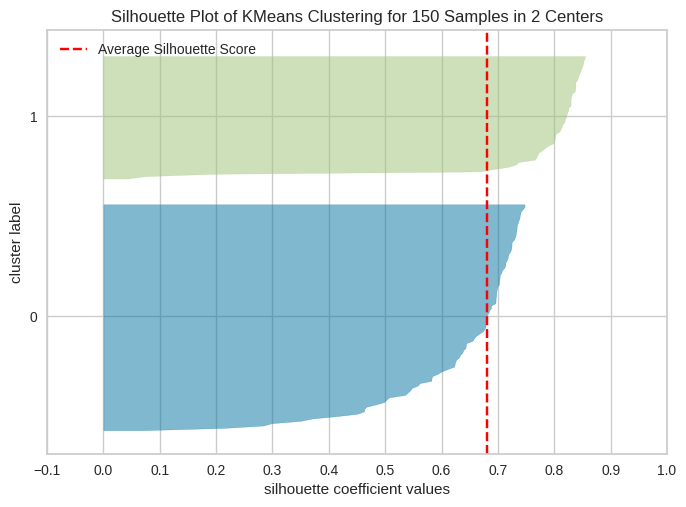

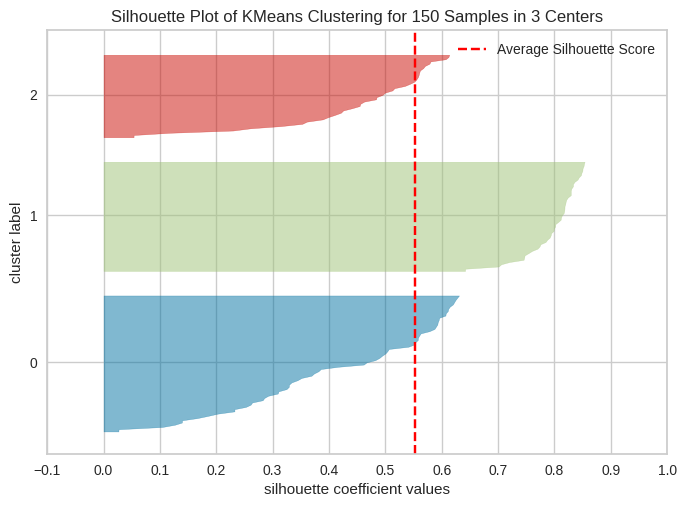

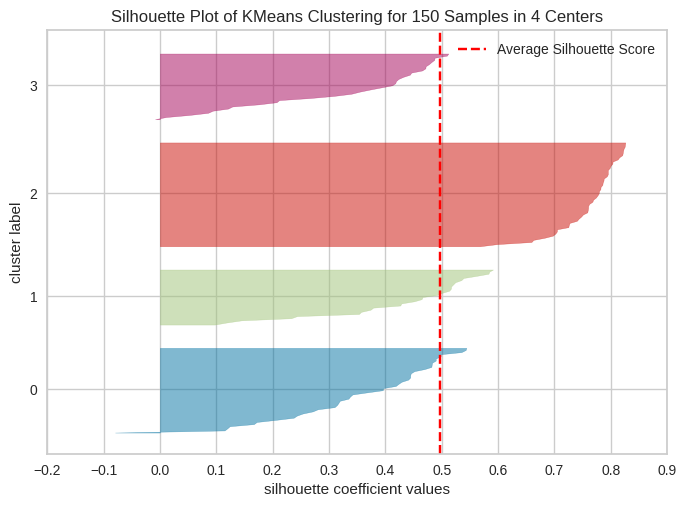

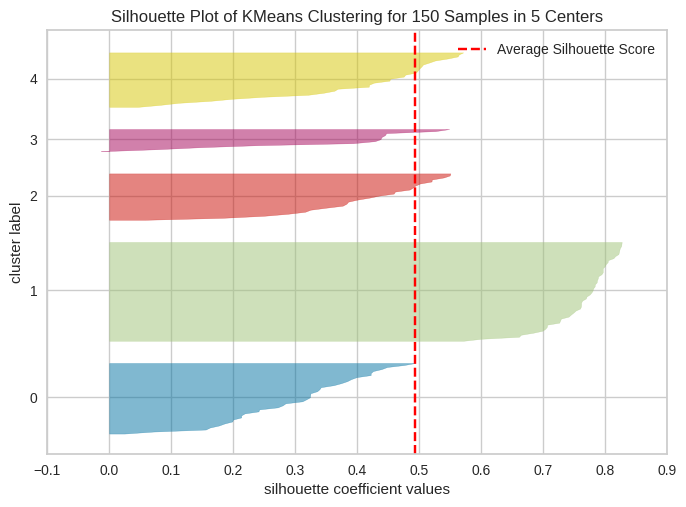

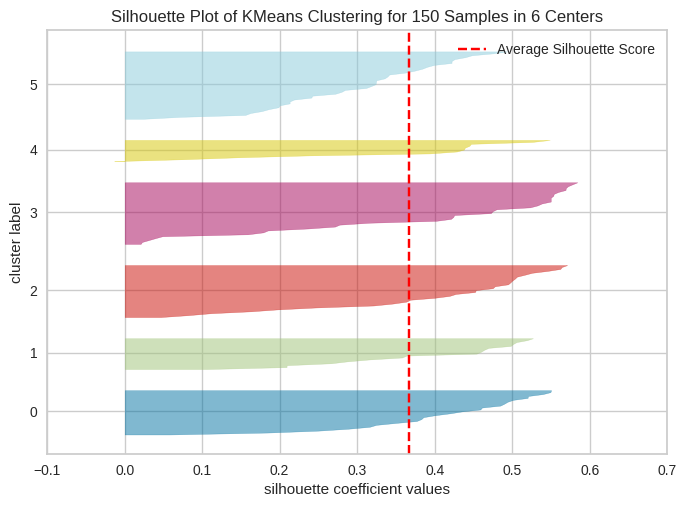

In [ ]:
# Iris Clustering with K-means and silhouette graphs
X = load_iris()
for k in range(2, 7):
  kmeans = KMeans(n_clusters=k, init='random', n_init=10)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(X)
  visualizer.show()

Discuss your results and justify which clustering is best based on the silhouette graphs

If we were just going on highest average silhouette score, I would choose k=2, because its average score is about 0.68, which is higher than any of the other groupings. However, it is also important to consider other factors, such as the distribution of those scores. For example, even if the average is really high, there could be several points that have a really low score (like in the negatives), and that would mean misclassifying several points (even if we are doing better on average).

However, even considering all of this, I believe that k=2 is still the best clustering. Looking at k=2, for cluster label 1 (green) you can see that almost all the points have a very high silhouette score (almost all of them are greater than 0.68), while there are only a few outliers. When you look at cluster 0, you can see that the clustering isn't quite as good, because it the second have of the points start to have scores that taper down. However, notice that almost all of the points (with the exception of a few) have a score of greater than 0.3, which isn't aweful.

Those are the reasons I believe k=2 is the best clustering. When you compare it to the other clusterings, it is clear than none of the others are all that good in comparison. Look at k=3 for example. In clusters 0 and 2 about half of the points are below a score of 0.4. Cluster 1 is pretty good, but it only accounts for about a third of the samples, and which doesn't quite outweight the poor clustering of the other two.

Looking at the other clusters, you can see a similar thing. With k=4 and 5, there is one cluster in each that is really good, while the others just aren't. In k=7, none of the clusters are really all that good.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [ ]:
#HAC with Iris
linkages = ["single", "average", "complete", "ward"]
headers = ["k", "single", "average", "complete", "ward"]
table = []

X = load_iris()
for k in range(2, 7):
  row = [k]
  for linkage in linkages:
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    row.append(silhouette_score(X, clustering.fit_predict(X)))
  table.append(row)

avgs = ["Avg", 0, 0, 0, 0]
for c in range(1, 5):
  for r in range(5):
    avgs[c] += table[r][c]
  avgs[c] /= 5
table.append(avgs)

print(tabulate(table, headers=headers))


k      single    average    complete      ward
---  --------  ---------  ----------  --------
2    0.686393   0.686393    0.51606   0.686393
3    0.511839   0.553934    0.51335   0.554097
4    0.281778   0.471665    0.499574  0.48874
5    0.283484   0.430342    0.349998  0.484155
6    0.221114   0.340659    0.342052  0.361885
Avg  0.396922   0.496599    0.444207  0.515054


*Discussion and linkage comparison*

Single linkage is perhaps the most simple one. Each time two clusters are combined, it simply picks the two clusters that have the shortest distance apart from the TWO CLOSEST TOGETHER POINTS. Average linkage picks the two clusters that have the shortest distance apart from the AVERAGE LOCATION OF EACH POINT IN EACH CLUSTER. Complete uses the shortest distance apart from the FURTHERS TWO POINTS OF THE TWO CLUSTERS. Ward linkage selects the two clusters that lead to the smallest increase in variance.

Looking at the results, ward linkage performed significantly better than the other linkage options. It isn't a surprise that it is the default. The problem with single linkage and complete linkage are that they are very susceptible to outliers. For example, with single linkage, if there are outlying points from each cluster that happen to be very close to each others, those clusters are likely to be chosen to merge with each other, even if they aren't actually a good fit.

The problem with complete linkage is similar to that of single linkage, except it makes it more likely that two clusters that should be combined to not be. For example, it two clusters are a good match to be linked together, but they both have outliers that are very far from each other in opposite directions, the two clusters probably won't be combined.

Average linkage is typically better than single and complete, because it is better at taking into account outliers and not being skewed by them.

My hypothesis is that ward linkage is typically the best because it selects clusters to combine based on actual results rather than just using heuristics from distances. It computes the change in variance and combines the clusters that result in the lowest increase in variance.

Looking at the results, my hypothesis is confirmed. Single performed the worst, followed by complete, then average, and the ward, which performed the best. Average did perform well, and close to as good as ward, but not quite as much.

It is also interesting to notice that the best k, based on average silhouette scores alone was k=2 for all types of linkage. While I don't think this will always be the case, I think it was in this case simply because of the particular dataset and how its data happened to be spread. Note though that as discussed in 2.2, the best average silhouette score doesn't always mean the best k-value. There are other factors to consider as well and looking at those as well as the silhouette graphs can shed light on that.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

algorithm    hyperparameters      silhouette
-----------  -----------------  ------------
HAC          n_clusters=2           0.407498
HAC          n_clusters=3           0.415906
HAC          n_clusters=4           0.258896
HAC          n_clusters=5           0.170148
KMeans       n_clusters=2           0.415878
KMeans       n_clusters=3           0.417603
KMeans       n_clusters=4           0.271565
KMeans       n_clusters=5           0.184793

Clustering with n_clusters=3
Labels:
[0 0 0 0 1 1 2 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 2 0 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 2 0 0 0 0 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 2 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 2 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1
 0 0 2 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 2 1 1 0 0 0 1 0 0 1 2 1 0 1 0 0 0 2
 2 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 1 0 1 0

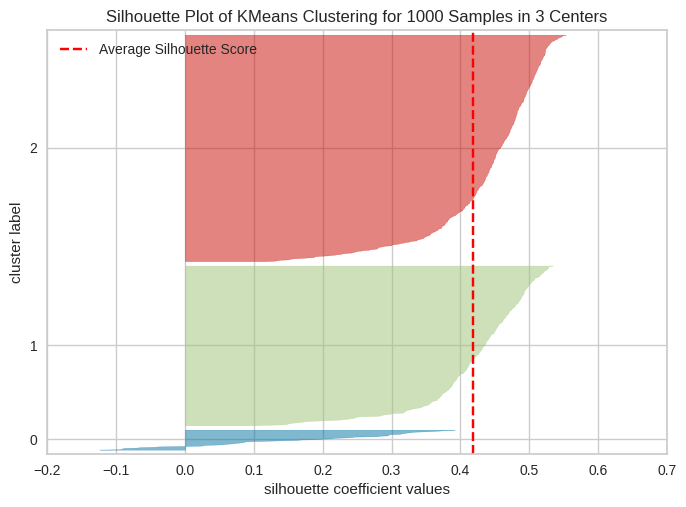

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Run both algoriths on a data set of your choice
X = load_credit_card_default()

headers = ["algorithm", "hyperparameters", "silhouette"]
table = []

hac_trials = [
    [{"n_clusters": 2}, "n_clusters=2"],
    [{"n_clusters": 3}, "n_clusters=3"],
    [{"n_clusters": 4}, "n_clusters=4"],
    [{"n_clusters": 5}, "n_clusters=5"],
]

for trial in hac_trials:
  params = trial[0]
  title = trial[1]
  clustering = AgglomerativeClustering(**params)
  table.append(["HAC", title, silhouette_score(X, clustering.fit_predict(X))])

kmeans_trials = [
    [{"n_clusters": 2}, "n_clusters=2"],
    [{"n_clusters": 3}, "n_clusters=3"],
    [{"n_clusters": 4}, "n_clusters=4"],
    [{"n_clusters": 5}, "n_clusters=5"],
]

for trial in kmeans_trials:
  params = trial[0]
  title = trial[1]
  kmeans = KMeans(init='k-means++', n_init=100, **params)
  table.append(["KMeans", title, silhouette_score(X, kmeans.fit_predict(X))])

print(tabulate(table, headers=headers))
print()

clustering = AgglomerativeClustering(n_clusters=3).fit(X)
print("Clustering with n_clusters=3")
print("Labels:")
print(clustering.labels_)
print("Silhouette Score:")
print(silhouette_score(X, clustering.fit_predict(X)))
print()

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=100).fit(X)
print("KMeans with n_clusters=3")
print("Labels:")
print(kmeans.labels_)
print("Silhouette Score:")
print(silhouette_score(X, kmeans.fit_predict(X)))
print("Silhouette Graph")
SilhouetteVisualizer(kmeans, colors='yellowbrick').fit(X).show()

*Discussion and comparison*

I decided to use a dataset on credit card defaults. This was an interesting dataset to choose, because I know that the classification labels were binary, so I was curious what clustering would reveal. Interestingly, both algorithms has better (just slightly) results using 3 clusters rather than 2.

I cleaned up the data by removing the headers, numbering column and classification column. Then I normalized the data because some attributes varied by hundreds of thousands while others only varied by about 3.

The parameter that I chose to vary between trials for both algorithms was the number of clusters. I only wanted to change 1 parameter because if I were to change more than 1, it would be hard to know which ones were improving or worstening results. For other parameters, I chose what was likely to work well. For HAC, the main parameter that really matters is linkage, but the default is 'ward' and that tends to be the best, so I left it. For KMeans, I used init='k-means++', and n_init=100. Using 'k-means++' makes it run a simple version of the algorithm to determine initial centroids. Setting n_init to 100 means that it runs the algorithm 100 times with different starting centroids and picks the clustering with the best results. With each number of clusters,  k-means scored slightly better than HAC. I'm sure that having n_init definitely gave it a better chance of reaching that.

Looking at the labels for both when doing a separate trial with k=3 (which I chose because that yielded the highest average silhouette score above), you can see that most of the labels are the same between the two. The silhouette is really insightful because it shows the problem with clustering with 3 clusters when the data (in labeled form) only has 2 classes. You can see that clusters 1 and 2 have the majority of instances while cluster 0 only has a few and has fairly low silhouette scores. This is an indicator that the clusters are naturally better as just 2 rather than three, and indicates that the data likely has a binary classification. Since cluster 0 is so small, with several of the instances being in the negatives, it shows that that cluster mostly exists because it has to with k=3. It is interesting that it performed better than the k=3, but the difference was really small, and basically just represents the few instances that were taken out of clusters 1 and 2 to create cluster 0. My hypothesis on the slight increase of average silhouette is because removing those few outliers, it helped the remaining instances in 1 and 2 to be a little more comfortable in their clusters.

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

Discussion and comparision of each model implemented

For the clusterers, I decided to also code up the silhouette algorithm and place it in the base. This way, I would be able to see a score for results rather than just being able to look at the labels. It took a little extra time but was worth it.

For both algorithms, I decided to have the fit method compute the final clusters, and then save them as a class variable. This way, I could look the clustering up in the sillhouette_score and print_labels functions. I took any methods that overlabbed between the two clusterers and placed them in the BaseClustering class.

I implemented the algorithms, one method at a time, testing my assumptions as I went to lower the chance of running into bugs, and had an overall seamless experience.

For the K-Means algorithm, I simply ran iterations until variance didn't improve, and kept the results from the highest variance. I calculated variance as the total SSE of each point, with the error being distance of a point to the centroid of its cluster. For the HAC algorithm, I ran iterations until there were k clusters left, which are specified by the user.

I was pretty happy with results. On the Iris dataset, KMeans had a silhouette score of 0.56, which is slightly better than the 0.49 that I scored using the Scikit Learn KMeans classifier. On the credit card dataset, my KMeans classifier has a silhouette score of 0.30, which is lower than the 0.41 that Scikit scored. There is some element of luck to this because of how the initial centroids end up being selected.

For the HAC clusterer, with Iris, it definitely scored higher using `complete` rather that `single` linkage which scored 0.56 and 0.32, respectively. Scikit scored 0.44, and 0.39, respectively, so mine did better with complete linkage while Scikit did better with single. Since HAC is a deterministic algorithm, I'm not entirely sure why results were different, but I'm sure there is some nuanced difference in how we each implemented it.

Another thing that was interesting to note is a core problem with single linkage. With k=3, two of the clusters were fairly well balanced while the other one only contained a single point. This is because that point was an outlier. Since single linkage always picks the closest clusters, any points that are really far out will likely remain lonely clusters while the other ones just keep getting bigger.

For HAC with the credit card default dataset, since the algorithm isn't very fast, I cut the number of instances down to just 400. While Scikit had a silhouette score of 0.41 using ward linkage, mine scored 0.57 with single linkage and 0.14 with complete linkage. Again, silhouette score isn't everything, and analyzing the distribution on the graphs would probably be insightful here.

In [23]:
class BaseClustering:
  def silhouette_score(self):
    score = 0
    for cluster_i, cluster in enumerate(self.clusters):
      for sample_i in cluster:
        # avg distance  of sample to all other instances in its cluster
        a_i = 0
        if (len(cluster) > 1):
          for other_sample_i in cluster:
            if sample_i != other_sample_i:
              a_i += self._manhattan_distance(X[sample_i], X[other_sample_i])
          a_i /= (len(cluster) - 1)

        # smallest avg distance of sample to instances in another cluster
        b_i = float('inf')
        for other_cluster_i, other_cluster in enumerate(self.clusters):
          if cluster_i != other_cluster_i:
            other_cluster_avg_dist = 0
            for other_sample_i in other_cluster:
              other_cluster_avg_dist += self._manhattan_distance(X[sample_i], X[other_sample_i])
            other_cluster_avg_dist /= len(other_cluster)
            b_i = min(b_i, other_cluster_avg_dist)

        s_i = (b_i - a_i) / max(a_i, b_i)
        score += s_i

    # get average score
    n_samples = sum(len(cluster) for cluster in self.clusters)
    score = score / n_samples

    return score

  def print_labels(self):
    '''Print the cluster label for each data point'''
    for i, cluster in enumerate(self.clusters):
      print(f'Cluster #{i}: {cluster}')

  def _manhattan_distance(self, a, b):
    assert(len(a) == len(b))

    distance = 0
    for i in range(len(a)):
      distance += abs(a[i] - b[i])

    return distance

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin,BaseClustering):
  def __init__(self,k=3,debug=False):
    """
    Args:
      k = how many final clusters to have
      debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
    """
    self.k = k
    self.debug = debug

  def fit(self, X, y=None):
    """ Fit the data; In this lab this will make the K clusters :D
    Args:
      X (array-like): A 2D numpy array with the training data
      y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
    Returns:
      self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
    """
    # get starting centroids
    all_sample_i = [i for i in range(len(X))]
    if not self.debug:
      random.shuffle(all_sample_i)
    starting_centroid_samples_i = [all_sample_i[i] for i in range(self.k)]
    starting_centroids = [X[i] for i in starting_centroid_samples_i]

    # get initial clusters and variance score
    self.clusters = self._calculate_clusters(X, starting_centroids)
    self.variance = self._calculate_variance(X, self.clusters)

    # iterate until no improvement seen
    while True:
      centroids = self._calculate_centroids(X, self.clusters)
      new_clusters = self._calculate_clusters(X, centroids)
      new_variance = self._calculate_variance(X, new_clusters)

      if new_variance >= self.variance:
        # no improvement
        break
      self.clusters = new_clusters
      self.variance = new_variance

    return self

  def _calculate_clusters(self, X: ndarray, centroids: List[List[int]]):
    '''Place samples into clusters'''
    clusters = [[] for i in range(self.k)]
    for sample_i, sample in enumerate(X):
      closest_cluster_i = 0
      closest_cluster_dist = float('inf')
      for cluster_i in range(self.k):
        centroid = centroids[cluster_i]
        dist = self._manhattan_distance(sample, centroid)

        if dist < closest_cluster_dist:
          closest_cluster_i = cluster_i
          closest_cluster_dist = dist

      clusters[closest_cluster_i].append(sample_i)

    return clusters

  def _calculate_centroids(self, X: ndarray, clusters: List[List[int]]) -> List[List[float]]:
    """
      clusters: List containing a list for each cluster with the indexes of samples iin the cluster
      EX: [[3], [1,2], [0,4]] (3 clusters)
          cluster 0 has sample 3, cluster 1 has samples 1 & 2
          and cluster 2 has samples 0 and 4

      Returns a list containing a list for each cluster's centroid with the values of each feature
      EX: [[c1_f1, c1_f2], [c2_f1, c2_f2]]
    """
    n_features = len(X[0])
    centroids = []
    for cluster in clusters:
      # centroid = avg value for each feature
      centroid = [0] * n_features
      for sample_i in cluster:
        sample = X[sample_i]

        for i in range(n_features):
          centroid[i] += sample[i] / len(cluster)

      centroids.append(centroid)

    return centroids

  def _calculate_variance(self, X: ndarray, clusters: List[List[int]]) -> float:
    '''Returns total SSE for all points, calculated as the distance to their cluster's centroid squared'''
    centroids = self._calculate_centroids(X, clusters)

    variance = 0
    for i in range(self.k):
      cluster = clusters[i]
      centroid = centroids[i]

      for sample_i in cluster:
        sample = X[sample_i]
        distance_to_centroid = self._manhattan_distance(sample, centroid)
        squared_error = self._squared_error(distance_to_centroid)

        variance += squared_error

    return variance

  def _squared_error(self, e: float):
    return e ** 2


In [65]:
class HACClustering(BaseEstimator,ClusterMixin,BaseClustering):
  def __init__(self,k=3,link_type='single'):
    """
    Args:
      k = how many final clusters to have
      link_type = single or complete. when combining two clusters use complete link or single link
    """
    self.link_type = link_type
    self.k = k

  def fit(self, X, y=None):
    """ Fit the data; In this lab this will make the K clusters :D
    Args:
      X (array-like): A 2D numpy array with the training data
      y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
    Returns:
      self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
    """
    clusters = self._create_initial_clusters(X)
    adj_matrix = self._calculate_adjacency_matrix(X, clusters)

    while len(clusters) > self.k:
      clusters = self._merge_two_clusters(adj_matrix, clusters)

    for cluster in clusters:
      cluster.sort()
    self.clusters = clusters

    return self

  def _merge_two_clusters(self, distances: List[List[float]], clusters: List[List[float]]) -> List[List[float]]:
    # find closest 2 clusters
    min_dist = float('inf')
    closest_clusters = None
    for cluster_i, cluster in enumerate(clusters):
      for other_cluster_i, other_cluster in enumerate(clusters):
        if cluster_i != other_cluster_i:
          if self.link_type == 'single':
            dist = self._single_link_distance(distances, cluster, other_cluster)
          else:
            assert(self.link_type == 'complete')
            dist = self._complete_link_distance(distances, cluster, other_cluster)
          if dist < min_dist:
            min_dist = dist
            closest_clusters = (cluster_i, other_cluster_i)

    # merge the closest
    clusters = self._merge(clusters, closest_clusters)

    return clusters

  def _single_link_distance(self, distances: List[List[float]], cluster: List[float], other_cluster: List[float]):
    min_dist = float('inf')
    for sample_i in cluster:
      for sample_j in other_cluster:
        min_dist = min(min_dist, distances[sample_i][sample_j])

    return min_dist

  def _complete_link_distance(self, distances: List[List[float]], cluster: List[float], other_cluster: List[float]):
    max_dist = -float('inf')
    for sample_i in cluster:
      for sample_j in other_cluster:
        max_dist = max(max_dist, distances[sample_i][sample_j])

    return max_dist

  def _merge(self, clusters: List[List[float]], closest_clusters: Tuple[float, float]) -> List[List[float]]:
    a, b = closest_clusters
    clusters[a].extend(clusters[b])
    clusters.pop(b)

    return clusters

  def _create_initial_clusters(self, X: ndarray) -> ndarray:
    '''Each point is initally its own cluster'''
    n_samples = X.shape[0]
    clusters = [[sample_i] for sample_i in range(n_samples)]

    return clusters

  def _calculate_adjacency_matrix(self, X: ndarray, initial_clusters: List[List[float]]) -> ndarray:
    n_samples = X.shape[0]
    matrix = [[0] * n_samples for _ in range(n_samples)]

    for i in range(n_samples):
      for j in range(i, n_samples):
        dist = self._manhattan_distance(X[i], X[j])

        matrix[i][j] = dist
        matrix[j][i] = dist

    return matrix

In [20]:
X = np.array([[0, 0], [0, 1], [1, 0], [10, 10], [9, 10], [10, 9]])
centroids = [[0, 0], [10, 10]]
kmeans = KMEANSClustering(k=2, debug=True).fit(X)
print("This problem was done by hand to verify correctness:")
print(kmeans.silhouette_score())

This problem was done by hand to verify correctness:
0.9282131661442006


In [49]:
print("KMEANS WITH IRIS")

kmeans = KMEANSClustering(k=3, debug=False)
X = load_iris()
kmeans.fit(X)
print("Silhouette Score: ", str(kmeans.silhouette_score()))
kmeans.print_labels()

KMEANS WITH IRIS
Silhouette Score:  0.5624945251223881
Cluster #0: [50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 149]
Cluster #1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Cluster #2: [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]


In [66]:
print("HAC WITH IRIS")

X = load_iris()
hac = HACClustering(k=3, link_type='single').fit(X)
print("HAC: k=3, link_type='single'")
print("Silhouette Score: ", str(hac.silhouette_score()))
hac.print_labels()
print()

hac = HACClustering(k=3, link_type='complete').fit(X)
print("HAC: k=3, link_type='complete'")
print("Silhouette Score: ", str(hac.silhouette_score()))
hac.print_labels()

HAC WITH IRIS
HAC: k=3, link_type='single'
Silhouette Score:  0.32245892235076257
Cluster #0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Cluster #1: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Cluster #2: [106]

HAC: k=3, link_type='complete'
Silhouette Score:  0.5636694833559682
Cluster #0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41

In [32]:
print("KMEANS WITH CREDIT_CARD_DEFAULT")

kmeans = KMEANSClustering(k=3, debug=False)
X = load_credit_card_default()
kmeans.fit(X)
print("Silhouette Score: ", str(kmeans.silhouette_score()))
kmeans.print_labels()

KMEANS WITH CREDIT_CARD_DEFAULT
Silhouette Score:  0.31888529410186106
Cluster #0: [4, 5, 9, 13, 14, 16, 24, 25, 26, 29, 31, 32, 34, 35, 38, 39, 42, 45, 48, 49, 50, 61, 62, 65, 66, 69, 70, 71, 74, 75, 76, 82, 85, 89, 95, 96, 97, 99, 100, 107, 108, 109, 111, 114, 115, 116, 117, 118, 120, 121, 124, 125, 126, 127, 128, 129, 131, 135, 136, 139, 140, 141, 142, 143, 144, 145, 147, 150, 151, 152, 155, 159, 160, 161, 162, 166, 167, 170, 174, 175, 176, 177, 180, 184, 190, 194, 201, 203, 205, 206, 210, 213, 215, 217, 226, 227, 228, 231, 232, 233, 235, 241, 248, 249, 251, 255, 261, 266, 269, 270, 271, 276, 278, 281, 286, 290, 292, 293, 294, 299, 300, 308, 312, 314, 315, 319, 320, 322, 325, 328, 329, 334, 341, 343, 350, 351, 352, 354, 355, 359, 362, 363, 367, 368, 370, 371, 373, 374, 375, 376, 378, 379, 382, 384, 387, 389, 390, 392, 394, 396, 400, 402, 403, 405, 418, 420, 423, 428, 434, 437, 440, 441, 445, 448, 450, 452, 454, 455, 456, 457, 459, 467, 468, 472, 473, 476, 479, 481, 483, 487, 492, 49

In [70]:
print("HAC WITH CREDIT_CARD_DEFAULT")

X = load_credit_card_default(n_samples=400)
hac = HACClustering(k=3, link_type='single').fit(X)
print("HAC: k=3, link_type='single'")
print("Silhouette Score: ", str(hac.silhouette_score()))
hac.print_labels()
print()

hac = HACClustering(k=3, link_type='complete').fit(X)
print("HAC: k=3, link_type='complete'")
print("Silhouette Score: ", str(hac.silhouette_score()))
hac.print_labels()

HAC WITH CREDIT_CARD_DEFAULT
HAC: k=3, link_type='single'
Silhouette Score:  0.5799321492360117
Cluster #0: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,